In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from img_manager import load_data
import os

import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
IMG_SIZE = 128
BATCH_SIZE = 32

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 128, 128, 3)
(2000,)
(212, 128, 128, 3)
(212,)


In [4]:
model = keras.models.Sequential(
    [
        keras.Input(shape=(IMG_SIZE,IMG_SIZE,3)),
        layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer = regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Conv2D(128, (3,3), activation='relu',  kernel_regularizer = regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Conv2D(256, (3,3), activation='relu',  kernel_regularizer = regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(256, activation='relu'),
        # layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ]
)

In [87]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 14, 14, 64)       

In [5]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [11]:
imgs = []
labels = []
for dir in os.listdir('img/validation/'):
    if dir[0] == 'T':
        is_human = True
    elif dir[0] == 'F':
        is_human = False
    path = 'img/validation/' + dir + '/'

    for file in os.listdir(path):
        img = cv2.imread(path+file)
        img = cv2.resize(img, (128,128))
        img = img.astype(dtype="float32") / 255.0
        imgs.append(img)
        labels.append(is_human)

X_val, y_val = tf.constant(imgs), tf.constant(labels)

In [14]:
history = model.fit(x_train, y_train, batch_size=32, epochs = 10, validation_data=(X_val, y_val))

Epoch 1/10
63/63 [==============================] - 145s 2s/step - loss: 0.7196 - accuracy: 0.9690 - val_loss: 1.0955 - val_accuracy: 0.9145
Epoch 2/10
63/63 [==============================] - 138s 2s/step - loss: 0.4352 - accuracy: 0.9810 - val_loss: 0.6480 - val_accuracy: 0.9512
Epoch 3/10
63/63 [==============================] - 142s 2s/step - loss: 0.3942 - accuracy: 0.9795 - val_loss: 1.0745 - val_accuracy: 0.9402
Epoch 4/10
63/63 [==============================] - 146s 2s/step - loss: 0.3642 - accuracy: 0.9860 - val_loss: 0.6082 - val_accuracy: 0.9609
Epoch 5/10
63/63 [==============================] - 113s 2s/step - loss: 0.4903 - accuracy: 0.9840 - val_loss: 0.6235 - val_accuracy: 0.9719
Epoch 6/10
63/63 [==============================] - 105s 2s/step - loss: 0.2816 - accuracy: 0.9895 - val_loss: 0.4094 - val_accuracy: 0.9695
Epoch 7/10
63/63 [==============================] - 125s 2s/step - loss: 0.2032 - accuracy: 0.9935 - val_loss: 0.8188 - val_accuracy: 0.9780
Epoch 8/10
63

In [25]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 2s 251ms/step - loss: 0.8840 - accuracy: 0.9623


[0.8839794397354126, 0.9622641801834106]

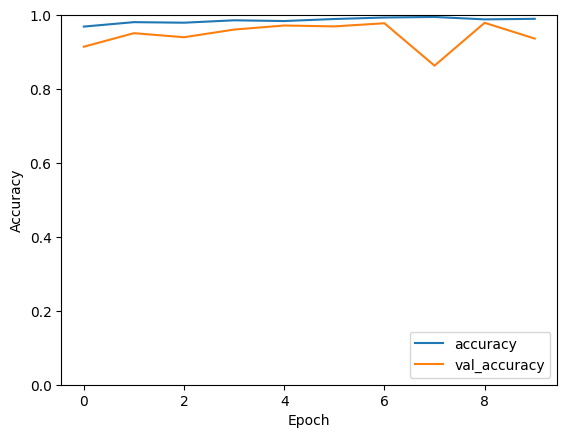

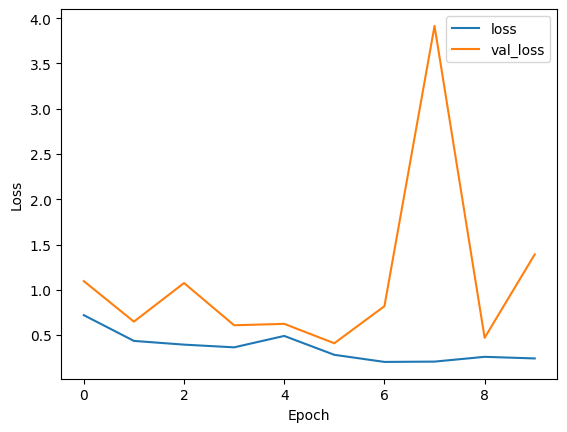

In [16]:
import matplotlib.pyplot as plt

# Dokładność treningowa i walidacyjna
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Strata treningowa i walidacyjna
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [24]:
model.save('model/face_reco_new.h5')

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

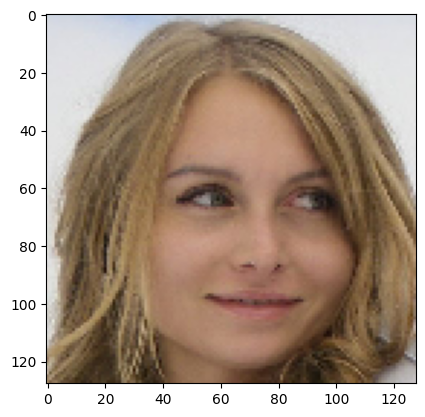

NameError: name 'model' is not defined

In [6]:
dir = 'img/test/THumans/'

i=0
for file in os.listdir(dir):
        path = dir+file
        img = image.load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
        plt.imshow(img)
        plt.show()

        X = image.img_to_array(img)
        X = np.expand_dims(X, axis = 0)
        images = np.vstack([X])
        label = model.predict(images)

        if label == 0:
                print("Not Human")
        elif label == 1:
                print("Human")

        i += 1
        if i ==10:
            break